In [1]:
import tensorflow as tf
from tensorflow import keras

In [39]:
tf.__version__

'2.0.0'

In [40]:
keras.__version__

'2.2.4-tf'

In [2]:
# Import MNIST fashion
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [3]:
# Validation set split with scaling
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [43]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_names[y_train[0]]

'Coat'

In [45]:
# Keras Sequential API
del model
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))   # alternatively use .InputLayer(input_shape=[28, 28])
model.add(keras.layers.Dense(300, activation='relu'))   # alternatively use activation=keras.activations.relu
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [46]:
# Alternatively 

model = keras.models.Sequential([
    keras.layers.InputLayer(input_shape=[28, 28]),
    keras.layers.Dense(300, activation=keras.activations.relu),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [47]:
# Production code
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation='relu'),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_25 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_26 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


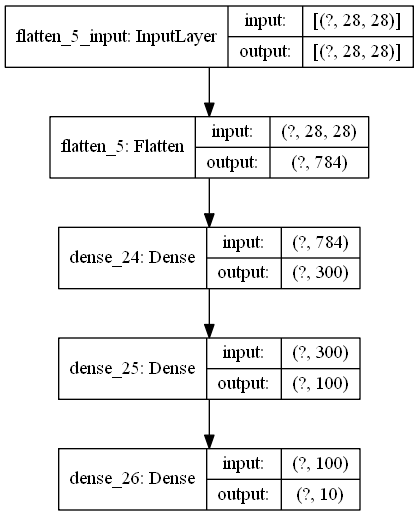

In [48]:
# Image of model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [49]:
# List of layers
model.layers

In [50]:
weights, biases = model.layers[1].get_weights()
weights.shape, biases.shape

((784, 300), (300,))

In [51]:
# Compiling model
model.compile(loss='sparse_categorical_crossentropy',   # alternatively loss=keras.losses.sparse_categorical_crossentropy
             optimizer='sgd',   # alternatively optimizer=keras.optimizers.SGD()
             metrics=['accuracy'])   # alternatively keras.metrics.sparse_categorical_accuracy()

In [52]:
# Compiling model with learning rate specified
#model.compile(loss='sparse_categorical_crossentropy',
#             optimizer=keras.optimizers.SGD(learning_rate=0.01),
#             metrics=['accuracy'])

In [54]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 5s 90us/sample - loss: 0.7114 - accuracy: 0.7649 - val_loss: 0.5114 - val_accuracy: 0.8208
Epoch 2/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4890 - accuracy: 0.8278 - val_loss: 0.4531 - val_accuracy: 0.8444
Epoch 3/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4460 - accuracy: 0.8427 - val_loss: 0.4237 - val_accuracy: 0.8540
Epoch 4/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4196 - accuracy: 0.8532 - val_loss: 0.4045 - val_accuracy: 0.8632
Epoch 5/30
55000/55000 [==============================] - 5s 83us/sample - loss: 0.4001 - accuracy: 0.8588 - val_loss: 0.3990 - val_accuracy: 0.8646
Epoch 6/30
55000/55000 [==============================] - 4s 81us/sample - loss: 0.3845 - accuracy: 0.8653 - val_loss: 0.3767 - val_accuracy: 0.8698
Epoch 7/30
55000/55000 [==============================] -

In [55]:
# Training with training set split for validation
#model.fit(x_train, y_train, epochs=30, validation_split=0.2)

In [56]:
# use class_weight param for skewed data
# use sample_weight param if some samples are more trustworthily labeled than others

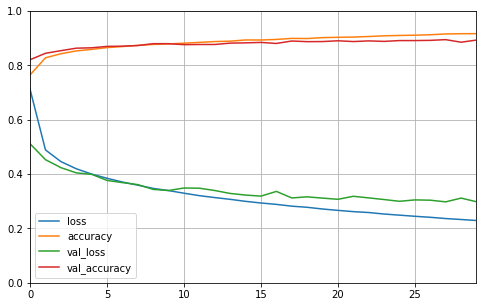

In [57]:
# Plotting training
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
# Tuning tips
#(tune learning rate first)
#(change the optimizer)
#(retune learning rate after changing a param)
#(change number of layers, neurons per layers, activation function)
#(change batch size)

In [59]:
# Evaluation
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.33104997556209564, 0.8842]

In [61]:
# Make prediction of probabilities
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [65]:
# Make prediction of class
import numpy as np

y_pred = model.predict_classes(X_new)
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [66]:
# Regression MLP

In [14]:
# Import simplified california housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [71]:
# Model
# Architecture
model = Sequential([
    Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    Dense(1)
])

# Compile
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(learning_rate=0.01))

# Fit
history = model.fit(X_train, y_train, epochs=20,
                   validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 108us/sample - loss: 0.7367 - val_loss: 0.9000
Epoch 2/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.4433 - val_loss: 3.5491
Epoch 3/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4344 - val_loss: 23.1443
Epoch 4/20
11610/11610 [==============================] - 1s 73us/sample - loss: 0.5214 - val_loss: 11.6618
Epoch 5/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.5172 - val_loss: 0.7672
Epoch 6/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.3995 - val_loss: 0.3766
Epoch 7/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.4040 - val_loss: 0.3612
Epoch 8/20
11610/11610 [==============================] - 1s 77us/sample - loss: 0.3804 - val_loss: 0.3557
Epoch 9/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.3856 - va

In [72]:
# Test
model.evaluate(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.34737467495507973

In [73]:
# Functional API

In [76]:
# Deep and wide architecture
from tensorflow.keras.layers import Input, Concatenate, Dense
from tensorflow.keras import Model

input_ = Input(shape=X_train.shape[1:])
hidden1 = Dense(30, activation='relu')(input_)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = Concatenate()([input_, hidden2])   # alternatively use the concatenate() function
output = Dense(1)(concat)

model = Model(inputs=[input_], outputs=[output])

In [77]:
# Sending different sets of features through different paths
from tensorflow.keras.layers import concatenate

input_A = Input(shape=[5], name='wide_input')
input_B = Input(shape=[6], name='deep_input')
hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = concatenate([input_A, hidden2])
output = Dense(1, name='output')(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

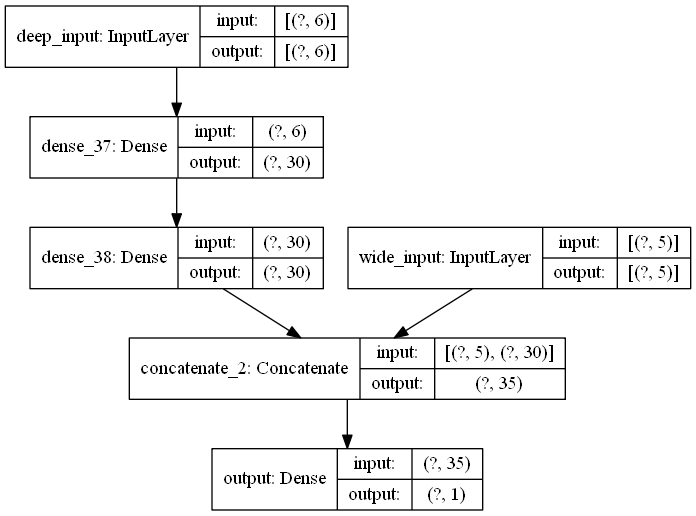

In [78]:
plot_model(model, show_shapes=True)

In [79]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [15]:
# Create datasets for seperate inputs
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [82]:
# Fit
history = model.fit((X_train_A, X_train_B), y_train, epochs = 20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 115us/sample - loss: 2.0302 - val_loss: 1.0795
Epoch 2/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.7706 - val_loss: 0.6862
Epoch 3/20
11610/11610 [==============================] - 1s 87us/sample - loss: 0.6767 - val_loss: 0.6287
Epoch 4/20
11610/11610 [==============================] - 1s 90us/sample - loss: 0.6374 - val_loss: 0.6052
Epoch 5/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.6088 - val_loss: 0.5770
Epoch 6/20
11610/11610 [==============================] - 1s 93us/sample - loss: 0.5839 - val_loss: 0.5548
Epoch 7/20
11610/11610 [==============================] - 1s 102us/sample - loss: 0.5622 - val_loss: 0.5374
Epoch 8/20
11610/11610 [==============================] - 1s 89us/sample - loss: 0.5422 - val_loss: 0.5245
Epoch 9/20
11610/11610 [==============================] - 1s 86us/sample - loss: 0.5253 - val

In [83]:
y_pred

array([[0.61635154],
       [1.9708424 ],
       [2.99409   ]], dtype=float32)

In [97]:
# Adding auxiliary outputs to a model
#(aux output can regularize, it forces a specific part of a model to learn and output something)
input_A = Input(shape=[5], name='wide_input')
input_B = Input(shape=[6], name='deep_input')
hidden1 = Dense(30, activation='relu')(input_B)
hidden2 = Dense(30, activation='relu')(hidden1)
concat = concatenate([input_A, hidden2])
output = Dense(1, name='main_output')(concat)
aux_output = Dense(1, name='aux_output')(hidden2)

model = Model(inputs=[input_A, input_B], outputs=[output, aux_output])

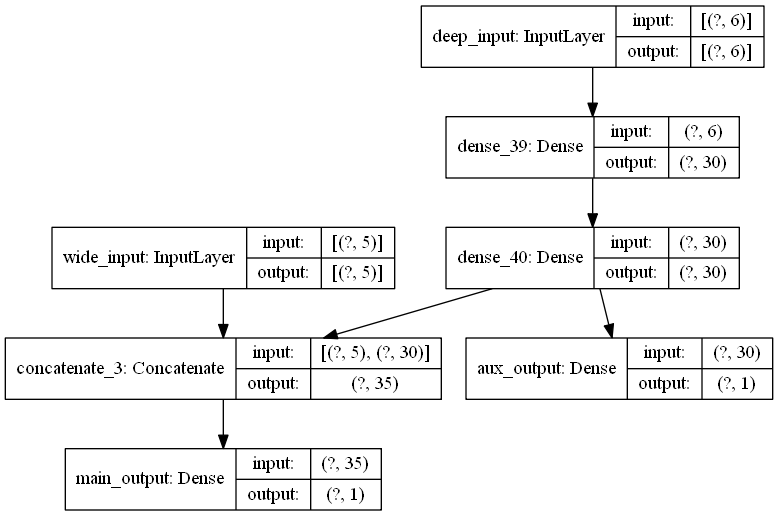

In [85]:
plot_model(model, show_shapes=True)

In [98]:
model.compile(loss=['mse', 'mse'],   # gives seperate loss to seperate outputs
             loss_weights=[0.9, 0.1],   # gives more weight to main output, they will be sum up otherwise
             optimizer = keras.optimizers.SGD(learning_rate=1e-3))

In [99]:
# Fit
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train],   # seperate labels for outputs
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 173us/sample - loss: 3.0914 - main_output_loss: 2.8084 - aux_output_loss: 5.6279 - val_loss: 5.3208 - val_main_output_loss: 5.3905 - val_aux_output_loss: 4.6707
Epoch 2/20
11610/11610 [==============================] - 1s 124us/sample - loss: 1.1950 - main_output_loss: 0.9203 - aux_output_loss: 3.6656 - val_loss: 1.3919 - val_main_output_loss: 1.2286 - val_aux_output_loss: 2.8574
Epoch 3/20
11610/11610 [==============================] - 1s 121us/sample - loss: 0.8797 - main_output_loss: 0.7027 - aux_output_loss: 2.4719 - val_loss: 0.8157 - val_main_output_loss: 0.6419 - val_aux_output_loss: 2.3779
Epoch 4/20
11610/11610 [==============================] - 1s 125us/sample - loss: 0.7611 - main_output_loss: 0.6335 - aux_output_loss: 1.9089 - val_loss: 0.7706 - val_main_output_loss: 0.6054 - val_aux_output_loss: 2.2560
Epoch 5/20
11610/11610 [==============================] - 1s 12

In [100]:
# Record separate loss
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B],
                                                [y_test, y_test],
                                                verbose=0)
total_loss, main_loss, aux_loss

(0.4983934212100598, 0.43347663, 1.0848849)

In [91]:
# Seperate predictions
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])
y_pred_main, y_pred_aux

(array([[0.51808137],
        [1.7726965 ],
        [2.9691095 ]], dtype=float32), array([[1.0533599],
        [1.9554383],
        [2.5261357]], dtype=float32))

In [92]:
# Subclassing API
#(fancy programmy modeling)
#(allows for dynamic behaviours in model (loops, conditionals))

In [93]:
# Wide and deep
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, concatenate

class WideDeepModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = Dense(units, activation=activation)
        self.hidden2 = Dense(units, activation=activation)
        self.main_output = Dense(1)
        self.aux_output = Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

model = WideDeepModel()

In [101]:
# Save a model (architecture and parameters)
model.save('model.h5')

In [102]:
# Load the model
model = keras.models.load_model('model.h5')

In [96]:
# Checkpoint while training / Callbacks

In [104]:
# Save at the end of each epoch
checkpoint_cb = keras.callbacks.ModelCheckpoint('model.h5')
history = model.fit([X_train_A, X_train_B], 
                    [y_train, y_train],
                    epochs=10, callbacks=[checkpoint_cb])

Train on 11610 samples
Epoch 1/10
11610/11610 [==============================] - 2s 134us/sample - loss: 0.4995 - main_output_loss: 0.4346 - aux_output_loss: 1.0835
Epoch 2/10
11610/11610 [==============================] - 1s 105us/sample - loss: 0.4959 - main_output_loss: 0.4328 - aux_output_loss: 1.0634
Epoch 3/10
11610/11610 [==============================] - 1s 108us/sample - loss: 0.4929 - main_output_loss: 0.4315 - aux_output_loss: 1.0450
Epoch 4/10
11610/11610 [==============================] - 1s 105us/sample - loss: 0.4897 - main_output_loss: 0.4302 - aux_output_loss: 1.0261
Epoch 5/10
11610/11610 [==============================] - 1s 106us/sample - loss: 0.4866 - main_output_loss: 0.4286 - aux_output_loss: 1.0086
Epoch 6/10
11610/11610 [==============================] - 1s 106us/sample - loss: 0.4837 - main_output_loss: 0.4273 - aux_output_loss: 0.9902
Epoch 7/10
11610/11610 [==============================] - 1s 103us/sample - loss: 0.4809 - main_output_loss: 0.4263 - aux_out

In [105]:
# Save at best validation error
checkpoint_cb = keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True)

history = model.fit([X_train_A, X_train_B], 
                    [y_train, y_train],
                    epochs=10, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 139us/sample - loss: 0.4708 - main_output_loss: 0.4219 - aux_output_loss: 0.9106 - val_loss: 0.4648 - val_main_output_loss: 0.4045 - val_aux_output_loss: 1.0062
Epoch 2/10
11610/11610 [==============================] - 1s 126us/sample - loss: 0.4684 - main_output_loss: 0.4210 - aux_output_loss: 0.8960 - val_loss: 0.4626 - val_main_output_loss: 0.4033 - val_aux_output_loss: 0.9953
Epoch 3/10
11610/11610 [==============================] - 1s 127us/sample - loss: 0.4661 - main_output_loss: 0.4199 - aux_output_loss: 0.8816 - val_loss: 0.4679 - val_main_output_loss: 0.4116 - val_aux_output_loss: 0.9736
Epoch 4/10
11610/11610 [==============================] - 1s 126us/sample - loss: 0.4637 - main_output_loss: 0.4188 - aux_output_loss: 0.8680 - val_loss: 0.4688 - val_main_output_loss: 0.4142 - val_aux_output_loss: 0.9588
Epoch 5/10
11610/11610 [==============================] - 1s 12

In [106]:
# Load at best validation error
model = keras.models. load_model('model.h5')

In [108]:
# Combined with early stopping
early_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint('model.h5', save_best_only=True)

history = model.fit([X_train_A, X_train_B], 
                    [y_train, y_train],
                    epochs=100, 
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
                    callbacks=[checkpoint_cb, early_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 132us/sample - loss: 0.4346 - main_output_loss: 0.4044 - aux_output_loss: 0.7052 - val_loss: 0.4225 - val_main_output_loss: 0.3870 - val_aux_output_loss: 0.7411
Epoch 2/100
11610/11610 [==============================] - 1s 127us/sample - loss: 0.4334 - main_output_loss: 0.4037 - aux_output_loss: 0.6999 - val_loss: 0.4419 - val_main_output_loss: 0.4109 - val_aux_output_loss: 0.7205
Epoch 3/100
11610/11610 [==============================] - 1s 125us/sample - loss: 0.4322 - main_output_loss: 0.4031 - aux_output_loss: 0.6940 - val_loss: 0.4341 - val_main_output_loss: 0.4032 - val_aux_output_loss: 0.7115
Epoch 4/100
11610/11610 [==============================] - 1s 129us/sample - loss: 0.4309 - main_output_loss: 0.4024 - aux_output_loss: 0.6877 - val_loss: 0.4211 - val_main_output_loss: 0.3892 - val_aux_output_loss: 0.7066
Epoch 5/100
11610/11610 [==============================] - 

Epoch 74/100
11610/11610 [==============================] - 2s 190us/sample - loss: 0.3903 - main_output_loss: 0.3709 - aux_output_loss: 0.5655 - val_loss: 0.3702 - val_main_output_loss: 0.3486 - val_aux_output_loss: 0.5632
Epoch 75/100
11610/11610 [==============================] - 2s 188us/sample - loss: 0.3899 - main_output_loss: 0.3703 - aux_output_loss: 0.5643 - val_loss: 0.3816 - val_main_output_loss: 0.3596 - val_aux_output_loss: 0.5791
Epoch 76/100
11610/11610 [==============================] - 2s 186us/sample - loss: 0.3895 - main_output_loss: 0.3701 - aux_output_loss: 0.5630 - val_loss: 0.3791 - val_main_output_loss: 0.3570 - val_aux_output_loss: 0.5766
Epoch 77/100
11610/11610 [==============================] - 2s 189us/sample - loss: 0.3891 - main_output_loss: 0.3697 - aux_output_loss: 0.5625 - val_loss: 0.3732 - val_main_output_loss: 0.3514 - val_aux_output_loss: 0.5683
Epoch 78/100
11610/11610 [==============================] - 2s 191us/sample - loss: 0.3886 - main_output

In [109]:
# Subclass keras callbacks to create custom callback
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [5]:
# Tensorboard Visualization

In [6]:
import os
root_logdir = os.path.join(os.curdir, 'my_logs')

In [7]:
# Generate subdirectory based on time
def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d-%H_%M_%S')
    return os.path.join(root_logdir, run_id)

In [8]:
run_logdir = get_run_logdir()

In [9]:
# Example model
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Dense(30, activation='relu', input_shape=[8]),
    Dense(30, activation='relu'),
    Dense(1)
])
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))

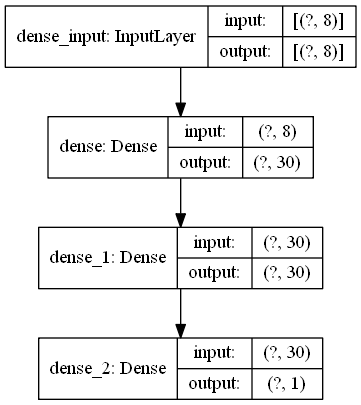

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [22]:
# Fit
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3819 - val_loss: 0.4117
Epoch 2/30
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3806 - val_loss: 0.4140
Epoch 3/30
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3790 - val_loss: 0.4170
Epoch 4/30
11610/11610 [==============================] - 1s 88us/sample - loss: 0.3776 - val_loss: 0.4577
Epoch 5/30
11610/11610 [==============================] - 1s 89us/sample - loss: 0.3769 - val_loss: 0.4029
Epoch 6/30
11610/11610 [==============================] - 1s 84us/sample - loss: 0.3756 - val_loss: 0.4213
Epoch 7/30
11610/11610 [==============================] - 1s 85us/sample - loss: 0.3745 - val_loss: 0.4050
Epoch 8/30
11610/11610 [==============================] - 1s 90us/sample - loss: 0.3734 - val_loss: 0.4154
Epoch 9/30
11610/11610 [==============================] - 1s 86us/sample - loss: 0.3719 - val_l

In [21]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 20332.

In [23]:
# Fine-Tuning

In [31]:
# Model builder function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense
from tensorflow.keras.optimizers import SGD

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = Sequential()
    model.add(InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(Dense(n_neurons, activation='relu'))
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model

In [32]:
# Wrap into scikit-learn
#(to utilize sklearn fit(), score(), and predict() methods)
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
# Fit with wrapping
keras_reg.fit(X_train, y_train, epochs=50,
             validation_data=(X-valid, y_valid),   # extra params will be pass to Keras model
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [33]:
# Tuning with randomizedCV
import numpy as np
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    'n_hidden': [0, 1, 2, 3],
    'n_neurons': np.arange(1, 100),
    'learning_rate': reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=50,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 135us/sample - loss: 1.0348 - val_loss: 6.3327
Epoch 2/50
7740/7740 [==============================] - 1s 85us/sample - loss: 0.6956 - val_loss: 12.8769
Epoch 3/50
7740/7740 [==============================] - 1s 86us/sample - loss: 0.7009 - val_loss: 0.4114
Epoch 4/50
7740/7740 [==============================] - 1s 88us/sample - loss: 0.4227 - val_loss: 0.3820
Epoch 5/50
7740/7740 [==============================] - 1s 88us/sample - loss: 0.4035 - val_loss: 0.3753
Epoch 6/50
7740/7740 [==============================] - 1s 84us/sample - loss: 0.3980 - val_loss: 0.3625
Epoch 7/50
7740/7740 [==============================] - 1s 84us/sample - loss: 0.3884 - val_loss: 0.3565
Epoch 8/50
7740/7740 [==============================] - 1s 86us/sample - loss: 0.3829 - val_loss: 0.3901
Epoch 9/50
7740/7740 [==============================] - 1s 84us/sample - loss: 0.3917 - val_loss: 0.3541
Epoch

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 120us/sample - loss: 0.8925 - val_loss: 0.8698
Epoch 2/50
7740/7740 [==============================] - 1s 88us/sample - loss: 0.4974 - val_loss: 1.5602
Epoch 3/50
7740/7740 [==============================] - 1s 92us/sample - loss: 0.4501 - val_loss: 2.5078
Epoch 4/50
7740/7740 [==============================] - 1s 90us/sample - loss: 0.4264 - val_loss: 0.8765
Epoch 5/50
7740/7740 [==============================] - 1s 90us/sample - loss: 0.4411 - val_loss: 0.4226
Epoch 6/50
7740/7740 [==============================] - 1s 86us/sample - loss: 0.4218 - val_loss: 0.5593
Epoch 7/50
7740/7740 [==============================] - 1s 97us/sample - loss: 0.3967 - val_loss: 0.3827
Epoch 8/50
7740/7740 [==============================] - 1s 96us/sample - loss: 0.3911 - val_loss: 0.3829
Epoch 9/50
7740/7740 [==============================] - 1s 86us/sample - loss: 0.3864 - val_loss: 0.3608
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 146us/sample - loss: 1.1210 - val_loss: 0.5308
Epoch 2/50
7740/7740 [==============================] - 1s 106us/sample - loss: 0.4528 - val_loss: 1.2260
Epoch 3/50
7740/7740 [==============================] - 1s 105us/sample - loss: 0.4569 - val_loss: 1.7848
Epoch 4/50
7740/7740 [==============================] - 1s 104us/sample - loss: 0.4279 - val_loss: 2.2424
Epoch 5/50
7740/7740 [==============================] - 1s 107us/sample - loss: 0.4436 - val_loss: 1.8911
Epoch 6/50
7740/7740 [==============================] - 1s 108us/sample - loss: 0.4219 - val_loss: 0.3835
Epoch 7/50
7740/7740 [==============================] - 1s 104us/sample - loss: 0.3984 - val_loss: 0.3813
Epoch 8/50
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3928 - val_loss: 0.3632
Epoch 9/50
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3896 - val_loss: 0.371

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 167us/sample - loss: 3.7069 - val_loss: 2.7990
Epoch 2/50
7740/7740 [==============================] - 1s 115us/sample - loss: 1.5798 - val_loss: 1.8997
Epoch 3/50
7740/7740 [==============================] - 1s 113us/sample - loss: 1.0724 - val_loss: 1.1604
Epoch 4/50
7740/7740 [==============================] - 1s 116us/sample - loss: 0.8850 - val_loss: 0.8317
Epoch 5/50
7740/7740 [==============================] - 1s 115us/sample - loss: 0.8001 - val_loss: 0.7423
Epoch 6/50
7740/7740 [==============================] - 1s 113us/sample - loss: 0.7544 - val_loss: 0.7056
Epoch 7/50
7740/7740 [==============================] - 1s 114us/sample - loss: 0.7239 - val_loss: 0.6790
Epoch 8/50
7740/7740 [==============================] - 1s 114us/sample - loss: 0.7001 - val_loss: 0.6586
Epoch 9/50
7740/7740 [==============================] - 1s 117us/sample - loss: 0.6803 - val_loss: 0.645

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 174us/sample - loss: 3.0836 - val_loss: 25.3519
Epoch 2/50
7740/7740 [==============================] - 1s 137us/sample - loss: 1.2787 - val_loss: 29.3041
Epoch 3/50
7740/7740 [==============================] - 1s 133us/sample - loss: 0.9721 - val_loss: 25.9546
Epoch 4/50
7740/7740 [==============================] - 1s 135us/sample - loss: 0.8764 - val_loss: 21.0135
Epoch 5/50
7740/7740 [==============================] - 1s 132us/sample - loss: 0.8259 - val_loss: 16.3007
Epoch 6/50
7740/7740 [==============================] - 1s 137us/sample - loss: 0.7918 - val_loss: 12.5073
Epoch 7/50
7740/7740 [==============================] - 1s 133us/sample - loss: 0.7652 - val_loss: 9.2861
Epoch 8/50
7740/7740 [==============================] - 1s 135us/sample - loss: 0.7426 - val_loss: 6.7564
Epoch 9/50
7740/7740 [==============================] - 1s 131us/sample - loss: 0.7225 - val_loss:

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 185us/sample - loss: 2.7703 - val_loss: 3.1257
Epoch 2/50
7740/7740 [==============================] - 1s 134us/sample - loss: 1.2193 - val_loss: 1.2076
Epoch 3/50
7740/7740 [==============================] - 1s 134us/sample - loss: 0.8761 - val_loss: 0.9010
Epoch 4/50
7740/7740 [==============================] - 1s 135us/sample - loss: 0.7792 - val_loss: 0.7415
Epoch 5/50
7740/7740 [==============================] - 1s 128us/sample - loss: 0.7371 - val_loss: 0.7015
Epoch 6/50
7740/7740 [==============================] - 1s 129us/sample - loss: 0.7110 - val_loss: 0.6735
Epoch 7/50
7740/7740 [==============================] - 1s 122us/sample - loss: 0.6911 - val_loss: 0.6616
Epoch 8/50
7740/7740 [==============================] - 1s 124us/sample - loss: 0.6737 - val_loss: 0.6490
Epoch 9/50
7740/7740 [==============================] - 1s 127us/sample - loss: 0.6574 - val_loss: 0.630

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 181us/sample - loss: 0.7494 - val_loss: 14.1385
Epoch 2/50
7740/7740 [==============================] - 1s 134us/sample - loss: 0.5537 - val_loss: 20.4954
Epoch 3/50
7740/7740 [==============================] - 1s 150us/sample - loss: 0.5227 - val_loss: 21.2463
Epoch 4/50
7740/7740 [==============================] - 1s 145us/sample - loss: 0.5497 - val_loss: 0.6530
Epoch 5/50
7740/7740 [==============================] - 1s 186us/sample - loss: 0.4057 - val_loss: 0.8742
Epoch 6/50
7740/7740 [==============================] - 1s 151us/sample - loss: 0.3708 - val_loss: 5.3434
Epoch 7/50
7740/7740 [==============================] - 1s 140us/sample - loss: 0.4208 - val_loss: 0.5143
Epoch 8/50
7740/7740 [==============================] - 1s 133us/sample - loss: 0.3510 - val_loss: 0.3474
Epoch 9/50
7740/7740 [==============================] - 1s 140us/sample - loss: 0.3399 - val_loss: 0.

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 2s 204us/sample - loss: 0.7476 - val_loss: 0.4990
Epoch 2/50
7740/7740 [==============================] - 1s 140us/sample - loss: 0.4290 - val_loss: 0.4035
Epoch 3/50
7740/7740 [==============================] - 1s 137us/sample - loss: 0.3872 - val_loss: 0.5229
Epoch 4/50
7740/7740 [==============================] - 1s 136us/sample - loss: 0.3705 - val_loss: 0.9834
Epoch 5/50
7740/7740 [==============================] - 1s 133us/sample - loss: 0.3606 - val_loss: 0.8190
Epoch 6/50
7740/7740 [==============================] - 1s 135us/sample - loss: 0.3519 - val_loss: 0.7177
Epoch 7/50
7740/7740 [==============================] - 1s 136us/sample - loss: 0.3477 - val_loss: 1.2321
Epoch 8/50
7740/7740 [==============================] - 1s 130us/sample - loss: 0.3438 - val_loss: 0.7645
Epoch 9/50
7740/7740 [==============================] - 1s 128us/sample - loss: 0.3395 - val_loss: 0.789

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 168us/sample - loss: 0.8367 - val_loss: 5.7813
Epoch 2/50
7740/7740 [==============================] - 1s 125us/sample - loss: 0.5072 - val_loss: 6.9678
Epoch 3/50
7740/7740 [==============================] - 1s 124us/sample - loss: 0.4614 - val_loss: 4.5943
Epoch 4/50
7740/7740 [==============================] - 1s 127us/sample - loss: 0.4308 - val_loss: 0.8031
Epoch 5/50
7740/7740 [==============================] - 1s 127us/sample - loss: 0.3929 - val_loss: 0.5024
Epoch 6/50
7740/7740 [==============================] - 1s 122us/sample - loss: 0.3704 - val_loss: 0.3505
Epoch 7/50
7740/7740 [==============================] - 1s 121us/sample - loss: 0.3619 - val_loss: 0.3715
Epoch 8/50
7740/7740 [==============================] - 1s 121us/sample - loss: 0.3544 - val_loss: 0.3421
Epoch 9/50
7740/7740 [==============================] - 1s 124us/sample - loss: 0.3485 - val_loss: 0.340

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 140us/sample - loss: 4.0207 - val_loss: 4.6987
Epoch 2/50
7740/7740 [==============================] - 1s 105us/sample - loss: 1.8988 - val_loss: 3.9361
Epoch 3/50
7740/7740 [==============================] - 1s 98us/sample - loss: 1.2547 - val_loss: 1.9042
Epoch 4/50
7740/7740 [==============================] - 1s 102us/sample - loss: 0.9836 - val_loss: 1.1514
Epoch 5/50
7740/7740 [==============================] - 1s 102us/sample - loss: 0.8569 - val_loss: 0.8567
Epoch 6/50
7740/7740 [==============================] - 1s 102us/sample - loss: 0.7919 - val_loss: 0.7526
Epoch 7/50
7740/7740 [==============================] - 1s 100us/sample - loss: 0.7552 - val_loss: 0.7106
Epoch 8/50
7740/7740 [==============================] - 1s 96us/sample - loss: 0.7308 - val_loss: 0.6990
Epoch 9/50
7740/7740 [==============================] - 1s 98us/sample - loss: 0.7132 - val_loss: 0.6868
E

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 135us/sample - loss: 4.2367 - val_loss: 3.5984
Epoch 2/50
7740/7740 [==============================] - 1s 89us/sample - loss: 1.9278 - val_loss: 4.8870
Epoch 3/50
7740/7740 [==============================] - 1s 89us/sample - loss: 1.2044 - val_loss: 5.4708
Epoch 4/50
7740/7740 [==============================] - 1s 88us/sample - loss: 0.9382 - val_loss: 5.1449
Epoch 5/50
7740/7740 [==============================] - 1s 90us/sample - loss: 0.8252 - val_loss: 4.4502
Epoch 6/50
7740/7740 [==============================] - 1s 90us/sample - loss: 0.7684 - val_loss: 3.6748
Epoch 7/50
7740/7740 [==============================] - 1s 86us/sample - loss: 0.7346 - val_loss: 2.9615
Epoch 8/50
7740/7740 [==============================] - 1s 87us/sample - loss: 0.7111 - val_loss: 2.3673
Epoch 9/50
7740/7740 [==============================] - 1s 85us/sample - loss: 0.6927 - val_loss: 1.8773
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 119us/sample - loss: 4.0317 - val_loss: 3.2895
Epoch 2/50
7740/7740 [==============================] - 1s 86us/sample - loss: 2.0470 - val_loss: 3.0921
Epoch 3/50
7740/7740 [==============================] - 1s 86us/sample - loss: 1.3603 - val_loss: 2.0922
Epoch 4/50
7740/7740 [==============================] - 1s 86us/sample - loss: 1.0341 - val_loss: 1.3489
Epoch 5/50
7740/7740 [==============================] - 1s 85us/sample - loss: 0.8688 - val_loss: 0.9431
Epoch 6/50
7740/7740 [==============================] - 1s 86us/sample - loss: 0.7826 - val_loss: 0.7716
Epoch 7/50
7740/7740 [==============================] - 1s 87us/sample - loss: 0.7350 - val_loss: 0.7061
Epoch 8/50
7740/7740 [==============================] - 1s 84us/sample - loss: 0.7055 - val_loss: 0.6667
Epoch 9/50
7740/7740 [==============================] - 1s 84us/sample - loss: 0.6848 - val_loss: 0.6448
Epoch 

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 140us/sample - loss: 1.1410 - val_loss: 2.5048
Epoch 2/50
7740/7740 [==============================] - 1s 99us/sample - loss: 0.5557 - val_loss: 3.4937
Epoch 3/50
7740/7740 [==============================] - 1s 99us/sample - loss: 0.4791 - val_loss: 0.6983
Epoch 4/50
7740/7740 [==============================] - 1s 99us/sample - loss: 0.4195 - val_loss: 0.4453
Epoch 5/50
7740/7740 [==============================] - 1s 99us/sample - loss: 0.3932 - val_loss: 0.4040
Epoch 6/50
7740/7740 [==============================] - 1s 101us/sample - loss: 0.3812 - val_loss: 0.4048
Epoch 7/50
7740/7740 [==============================] - 1s 102us/sample - loss: 0.3722 - val_loss: 0.4148
Epoch 8/50
7740/7740 [==============================] - 1s 101us/sample - loss: 0.3649 - val_loss: 0.3586
Epoch 9/50
7740/7740 [==============================] - 1s 98us/sample - loss: 0.3597 - val_loss: 0.3819
Epo

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 171us/sample - loss: 1.0274 - val_loss: 0.5851
Epoch 2/50
7740/7740 [==============================] - 1s 115us/sample - loss: 0.5437 - val_loss: 0.7785
Epoch 3/50
7740/7740 [==============================] - 1s 115us/sample - loss: 0.4724 - val_loss: 0.9104
Epoch 4/50
7740/7740 [==============================] - 1s 116us/sample - loss: 0.4337 - val_loss: 0.9091
Epoch 5/50
7740/7740 [==============================] - 1s 117us/sample - loss: 0.4109 - val_loss: 0.5848
Epoch 6/50
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3938 - val_loss: 0.4546
Epoch 7/50
7740/7740 [==============================] - 1s 115us/sample - loss: 0.3826 - val_loss: 0.3674
Epoch 8/50
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3744 - val_loss: 0.3578
Epoch 9/50
7740/7740 [==============================] - 1s 120us/sample - loss: 0.3666 - val_loss: 0.394

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 173us/sample - loss: 1.4584 - val_loss: 1.0106
Epoch 2/50
7740/7740 [==============================] - 1s 127us/sample - loss: 0.5591 - val_loss: 0.6910
Epoch 3/50
7740/7740 [==============================] - 1s 124us/sample - loss: 0.4893 - val_loss: 0.4390
Epoch 4/50
7740/7740 [==============================] - 1s 127us/sample - loss: 0.4489 - val_loss: 0.4493
Epoch 5/50
7740/7740 [==============================] - 1s 129us/sample - loss: 0.4227 - val_loss: 0.3960
Epoch 6/50
7740/7740 [==============================] - 1s 133us/sample - loss: 0.4048 - val_loss: 0.4404
Epoch 7/50
7740/7740 [==============================] - 1s 126us/sample - loss: 0.3958 - val_loss: 0.3636
Epoch 8/50
7740/7740 [==============================] - 1s 128us/sample - loss: 0.3847 - val_loss: 0.4190
Epoch 9/50
7740/7740 [==============================] - 1s 131us/sample - loss: 0.3782 - val_loss: 0.369

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 192us/sample - loss: 0.8136 - val_loss: 2.0893
Epoch 2/50
7740/7740 [==============================] - 1s 152us/sample - loss: 0.4535 - val_loss: 6.3751
Epoch 3/50
7740/7740 [==============================] - 1s 180us/sample - loss: 0.4247 - val_loss: 8.1869
Epoch 4/50
7740/7740 [==============================] - 1s 166us/sample - loss: 0.4350 - val_loss: 0.5189
Epoch 5/50
7740/7740 [==============================] - 1s 149us/sample - loss: 0.3712 - val_loss: 0.4036
Epoch 6/50
7740/7740 [==============================] - 1s 147us/sample - loss: 0.3609 - val_loss: 0.3845
Epoch 7/50
7740/7740 [==============================] - 1s 143us/sample - loss: 0.3546 - val_loss: 0.3549
Epoch 8/50
7740/7740 [==============================] - 1s 141us/sample - loss: 0.3485 - val_loss: 0.3535
Epoch 9/50
7740/7740 [==============================] - 1s 140us/sample - loss: 0.3435 - val_loss: 0.364

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 2s 210us/sample - loss: 0.8384 - val_loss: 0.5936
Epoch 2/50
7740/7740 [==============================] - 1s 151us/sample - loss: 0.4467 - val_loss: 0.7950
Epoch 3/50
7740/7740 [==============================] - 1s 154us/sample - loss: 0.3984 - val_loss: 0.4152
Epoch 4/50
7740/7740 [==============================] - 1s 144us/sample - loss: 0.3792 - val_loss: 0.3607
Epoch 5/50
7740/7740 [==============================] - 1s 143us/sample - loss: 0.3674 - val_loss: 0.3865
Epoch 6/50
7740/7740 [==============================] - 1s 141us/sample - loss: 0.3577 - val_loss: 0.7595
Epoch 7/50
7740/7740 [==============================] - 1s 144us/sample - loss: 0.3516 - val_loss: 0.7791
Epoch 8/50
7740/7740 [==============================] - 1s 144us/sample - loss: 0.3436 - val_loss: 0.6581
Epoch 9/50
7740/7740 [==============================] - 1s 144us/sample - loss: 0.3380 - val_loss: 0.751

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 187us/sample - loss: 0.8294 - val_loss: 2.8410
Epoch 2/50
7740/7740 [==============================] - 1s 142us/sample - loss: 0.4784 - val_loss: 2.5203
Epoch 3/50
7740/7740 [==============================] - 1s 141us/sample - loss: 0.4286 - val_loss: 0.3926
Epoch 4/50
7740/7740 [==============================] - 1s 143us/sample - loss: 0.3879 - val_loss: 0.8034
Epoch 5/50
7740/7740 [==============================] - 1s 143us/sample - loss: 0.3809 - val_loss: 0.3687
Epoch 6/50
7740/7740 [==============================] - 1s 140us/sample - loss: 0.3674 - val_loss: 0.4547
Epoch 7/50
7740/7740 [==============================] - 1s 140us/sample - loss: 0.3597 - val_loss: 1.0087
Epoch 8/50
7740/7740 [==============================] - 1s 143us/sample - loss: 0.3655 - val_loss: 0.3487
Epoch 9/50
7740/7740 [==============================] - 1s 143us/sample - loss: 0.3502 - val_loss: 0.362

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 182us/sample - loss: 0.6879 - val_loss: 2.1327
Epoch 2/50
7740/7740 [==============================] - 1s 133us/sample - loss: 0.4130 - val_loss: 7.9468
Epoch 3/50
7740/7740 [==============================] - 1s 133us/sample - loss: 0.4474 - val_loss: 2.0511
Epoch 4/50
7740/7740 [==============================] - 1s 130us/sample - loss: 0.4933 - val_loss: 0.9229
Epoch 5/50
7740/7740 [==============================] - 1s 127us/sample - loss: 0.3777 - val_loss: 4.5876
Epoch 6/50
7740/7740 [==============================] - 1s 129us/sample - loss: 0.4009 - val_loss: 5.2660
Epoch 7/50
7740/7740 [==============================] - 1s 129us/sample - loss: 0.4115 - val_loss: 0.3553
Epoch 8/50
7740/7740 [==============================] - 1s 134us/sample - loss: 0.3386 - val_loss: 0.3853
Epoch 9/50
7740/7740 [==============================] - 1s 130us/sample - loss: 0.3346 - val_loss: 0.344

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 163us/sample - loss: 0.7122 - val_loss: 1.7059
Epoch 2/50
7740/7740 [==============================] - 1s 115us/sample - loss: 0.4175 - val_loss: 0.3914
Epoch 3/50
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3817 - val_loss: 0.3908
Epoch 4/50
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3620 - val_loss: 0.9435
Epoch 5/50
7740/7740 [==============================] - 1s 116us/sample - loss: 0.3513 - val_loss: 0.7780
Epoch 6/50
7740/7740 [==============================] - 1s 117us/sample - loss: 0.3457 - val_loss: 0.7446
Epoch 7/50
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3386 - val_loss: 0.4936
Epoch 8/50
7740/7740 [==============================] - 1s 113us/sample - loss: 0.3333 - val_loss: 0.5364
Epoch 9/50
7740/7740 [==============================] - 1s 114us/sample - loss: 0.3269 - val_loss: 0.975

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 152us/sample - loss: 0.8796 - val_loss: 0.5225
Epoch 2/50
7740/7740 [==============================] - 1s 109us/sample - loss: 0.4330 - val_loss: 1.0022
Epoch 3/50
7740/7740 [==============================] - 1s 114us/sample - loss: 0.4113 - val_loss: 10.4274
Epoch 4/50
7740/7740 [==============================] - 1s 110us/sample - loss: 0.4142 - val_loss: 3.5487
Epoch 5/50
7740/7740 [==============================] - 1s 109us/sample - loss: 0.4135 - val_loss: 0.4818
Epoch 6/50
7740/7740 [==============================] - 1s 111us/sample - loss: 0.3633 - val_loss: 1.4819
Epoch 7/50
7740/7740 [==============================] - 1s 110us/sample - loss: 0.3567 - val_loss: 1.5365
Epoch 8/50
7740/7740 [==============================] - 1s 109us/sample - loss: 0.3615 - val_loss: 0.4049
Epoch 9/50
7740/7740 [==============================] - 1s 136us/sample - loss: 0.3435 - val_loss: 0.32

Train on 7740 samples, validate on 3870 samples
Epoch 1/50
7740/7740 [==============================] - 1s 150us/sample - loss: 0.9463 - val_loss: 3.3817
Epoch 2/50
 704/7740 [=>............................] - ETA: 0s - loss: 0.5318WARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss


KeyboardInterrupt: 

In [ ]:
# Hyper param tuning libraries
# hyperopt
# hyperas, kopt (based on hyperopt), Talos are for Keras models
# keras-tuner
# scikit-optimize
# spearmint (Bayesian optimization)
# hyperband (recent)
# scikit-deap (based on evolutionary algorithms)